In [248]:
import pypsa ;


n1=pypsa.Network("./results/NG/networks/elec_s_10_ec_lcopt_Co2L-4H.nc")



INFO:pypsa.io:Imported network elec_s_10_ec_lcopt_Co2L-4H.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [249]:
import numpy as np
import math

In [250]:
n1.meta

{'version': '0.2.0',
 'tutorial': True,
 'logging': {'level': 'INFO', 'format': '%(levelname)s:%(name)s:%(message)s'},
 'countries': ['NG'],
 'enable': {'retrieve_databundle': False,
  'retrieve_cost_data': True,
  'download_osm_data': True,
  'build_cutout': False,
  'build_natura_raster': True},
 'run': {'name': 'NG',
  'shared_cutouts': True,
  'base_config': 'config.tutorial.yaml'},
 'scenario': {'simpl': [''],
  'll': ['copt'],
  'clusters': [10],
  'opts': ['Co2L-4H'],
  'unc': ['m0', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6']},
 'summary_dir': 'results',
 'snapshots': {'start': '2020-03-1', 'end': '2020-04-3', 'inclusive': 'left'},
 'crs': {'geo_crs': 'EPSG:4326',
  'distance_crs': 'EPSG:3857',
  'area_crs': 'ESRI:54009'},
 'retrieve_databundle': {'show_progress': False},
 'augmented_line_connection': {'add_to_snakefile': False,
  'connectivity_upgrade': 2,
  'new_line_type': ['HVAC'],
  'min_expansion': 1,
  'min_DC_length': 600},
 'cluster_options': {'simplify_network': {'to_substati

(<matplotlib.collections.PatchCollection at 0x27d4ddc0c10>,
 <matplotlib.collections.LineCollection at 0x27d4de05c00>)

e:\installs\envs\pypsa-earth\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


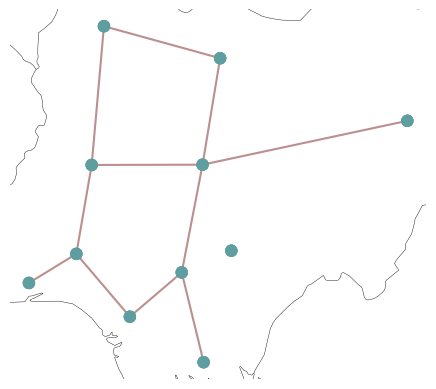

In [251]:
n1.plot()

In [252]:
n1.statistics()


Capacity Factor  Capital Expenditure  \
            carrier                                                    
Generator   Combined-Cycle Gas     7.113814e-01         1.417680e+08   
            Oil                    0.000000e+00         8.208971e+07   
            Onshore Wind           1.672744e-01         1.182254e+05   
            Open-Cycle Gas         3.712412e-01         2.715613e+08   
            Solar                  1.739298e-01         4.729597e+08   
            load                   1.866073e-20         0.000000e+00   
Line        AC                     2.858350e-01         2.716973e+08   
Link        H2 electrolysis                 NaN         0.000000e+00   
            H2 fuel cell                    NaN         0.000000e+00   
            battery charger                 NaN         0.000000e+00   
            battery discharger              NaN         0.000000e+00   
Load        -                               NaN                  NaN   
StorageUnit Reservoir & Dam                 NaN         0.000000e+00   
Store       Battery Storage                 NaN         0.000000e+00   
            Hydrogen Storage                NaN         0.000000e+00   

                                Curtailment  Installed Capacity  \
            carrier                                               
Generator   Combined-Cycle Gas     0.000000        1.431599e+03   
            Oil                    0.000000        2.167625e+03   
            Onshore Wind           0.038571        1.230415e+00   
            Open-Cycle Gas         0.000000        6.021930e+03   
            Solar                109.978534        2.609141e+01   
            load                   0.000000        1.100000e+10   
Line        AC                          NaN        2.810807e+04   
Link        H2 electrolysis             NaN        0.000000e+00   
            H2 fuel cell                NaN        0.000000e+00   
            battery charger             NaN        0.000000e+00   
            battery discharger          NaN        0.000000e+00   
Load        -                           NaN                 NaN   
StorageUnit Reservoir & Dam        0.000000        1.905414e+03   
Store       Battery Storage             NaN        0.000000e+00   
            Hydrogen Storage            NaN        0.000000e+00   

                                Operational Expenditure  Optimal Capacity  \
            carrier                                                         
Generator   Combined-Cycle Gas             3.958128e+04      1.431599e+03   
            Oil                            0.000000e+00      2.167625e+03   
            Onshore Wind                   5.152843e-03      1.230414e+00   
            Open-Cycle Gas                 1.196811e+05      6.021924e+03   
            Solar                          4.560933e+01      1.328461e+04   
            load                          -4.462621e-11      1.100000e+10   
Line        AC                                      NaN      2.219056e+04   
Link        H2 electrolysis                0.000000e+00      0.000000e+00   
            H2 fuel cell                   0.000000e+00      0.000000e+00   
            battery charger                0.000000e+00      0.000000e+00   
            battery discharger             0.000000e+00      0.000000e+00   
Load        -                                       NaN               NaN   
StorageUnit Reservoir & Dam                0.000000e+00      1.905414e+03   
Store       Battery Storage                0.000000e+00      0.000000e+00   
            Hydrogen Storage               0.000000e+00      0.000000e+00   

                                     Revenue        Supply    Withdrawal  
            carrier                                                       
Generator   Combined-Cycle Gas  5.358181e+04  1.018413e+03  0.000000e+00  
            Oil                 0.000000e+00  0.000000e+00  0.000000e+00  
            Onshore Wind        1.062327e+01  2.058167e-0

In [253]:
n1.statistics()[[x != 0 and not math.isnan(x) for x in n1.statistics()['Capital Expenditure']]]['Capital Expenditure'].loc["Generator"].drop("Solar")

carrier
Combined-Cycle Gas    1.417680e+08
Oil                   8.208971e+07
Onshore Wind          1.182254e+05
Open-Cycle Gas        2.715613e+08
Name: Capital Expenditure, dtype: float64

In [254]:
n1.statistics()['Capital Expenditure'].loc["Generator"].drop('load')

carrier
Combined-Cycle Gas    1.417680e+08
Oil                   8.208971e+07
Onshore Wind          1.182254e+05
Open-Cycle Gas        2.715613e+08
Solar                 4.729597e+08
Name: Capital Expenditure, dtype: float64

In [255]:
n1.statistics().describe()

,Capacity Factor,Capital Expenditure,Curtailment,Installed Capacity,Operational Expenditure,Optimal Capacity,Revenue,Supply,Withdrawal
count,7.000000,1.400000e+01,7.000000,1.400000e+01,1.300000e+01,1.400000e+01,1.500000e+01,1.100000e+01,1.100000e+01
mean,0.244237,8.858530e+07,15.716729,7.857171e+08,1.225446e+04,7.857176e+08,3.073763e+04,1.082512e+03,-1.082512e+03
std,0.247068,1.489010e+08,41.565551,2.939873e+09,3.408080e+04,2.939873e+09,6.497145e+04,1.967620e+03,2.414713e+03
min,0.000000,0.000000e+00,0.000000,0.000000e+00,-4.462621e-11,0.000000e+00,-8.458811e-10,0.000000e+00,-6.342839e+03
25%,0.083637,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.236986e-14
50%,0.173930,0.000000e+00,0.000000,1.366091e+01,0.000000e+00,7.164147e+02,0.000000e+00,8.052833e-14,0.000000e+00
75%,0.328538,1.268484e+08,0.019286,2.102072e+03,5.152843e-03,5.058349e+03,2.840194e+04,1.627000e+03,0.000000e+00
max,0.711381,4.729597e+08,109.978534,1.100000e+10,1.196811e+05,1.100000e+10,2.305322e+05,6.342839e+03,0.000000e+00


In [272]:
n1.generators.head(10)

,p_nom_max,weight,p_nom,capital_cost,efficiency,p_nom_min,marginal_cost,bus,carrier,p_nom_extendable,...,p_set,q_set,lifetime,committable,start_up_cost,shut_down_cost,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
Generator,,,,,,,,,,,,,,,,,,,,,
NG0 0 OCGT,inf,0.000000,824.725075,45095.441515,0.41,824.725075,53.535382,NG0 0,OCGT,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NG0 0 onwind,2.188642e+05,17147.260117,0.000000,96085.888020,1.00,0.000000,0.025528,NG0 0,onwind,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NG0 0 solar,2.206916e+05,36033.981726,1.593195,35602.071244,1.00,1.593195,0.020421,NG0 0,solar,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NG0 1 onwind,3.072763e+05,14384.039211,0.000000,96085.888020,1.00,0.000000,0.025349,NG0 1,onwind,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NG0 1 solar,5.304338e+05,93700.507178,5.494570,35602.071244,1.00,5.494570,0.020234,NG0 1,solar,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NG0 2 CCGT,inf,0.000000,1431.598949,99027.729293,0.58,1431.598949,38.865646,NG0 2,CCGT,False,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NG0 2 OCGT,inf,0.000000,606.415497,45095.441515,0.41,606.415497,53.535167,NG0 2,OCGT,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NG0 2 oil,inf,0.000000,944.862205,37870.807407,0.35,944.862205,148.866689,NG0 2,oil,False,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0
NG0 2 onwind,3.596264e+04,1560.000988,0.000000,96085.888020,1.00,0.000000,0.024510,NG0 2,onwind,True,...,0.0,0.0,inf,False,0.0,0.0,NaN,NaN,1.0,1.0


In [273]:
n1.buses.head(10)

,v_nom,country,x,y,control,generator,carrier,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,
NG0 0,300.0,NG,6.914892,7.066258,Slack,NG0 0 OCGT,AC,,None,1.0,0.0,inf,
NG0 1,300.0,NG,7.389775,9.523867,PQ,,AC,,None,1.0,0.0,inf,
NG0 2,300.0,NG,5.732033,6.056000,PQ,,AC,,None,1.0,0.0,inf,
NG0 3,300.0,NG,7.414267,5.019233,PQ,,AC,,None,1.0,0.0,inf,
NG0 4,300.0,NG,12.060480,10.524290,PQ,,AC,,None,1.0,0.0,inf,
NG0 5,300.0,NG,4.511129,7.489700,PQ,,AC,,None,1.0,0.0,inf,
NG0 6,300.0,NG,7.790400,11.951400,PQ,,AC,,None,1.0,0.0,inf,
NG0 7,300.0,NG,4.861125,9.517175,PQ,,AC,,None,1.0,0.0,inf,
NG0 8,300.0,NG,3.429873,6.826991,PQ,,AC,,None,1.0,0.0,inf,


In [286]:
n1.lines.head(5)

,bus0,bus1,num_parallel,length,type,s_max_pu,s_nom,capital_cost,s_nom_extendable,s_nom_min,...,s_nom_max,lifetime,terrain_factor,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu
Line,,,,,,,,,,,,,,,,,,,,,
1,NG0 0,NG0 1,2.368421,347.779326,Al/St 240/40 4-bundle 380.0,0.7,4021.821975,14338.225492,True,3175.122612,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
2,NG0 0,NG0 2,3.250000,215.394003,Al/St 240/40 4-bundle 380.0,0.7,5518.833488,8880.284677,True,4356.973806,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
3,NG0 0,NG0 3,1.184211,292.775421,Al/St 240/40 4-bundle 380.0,0.7,2010.910988,12073.744095,True,1587.561306,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
4,NG0 1,NG0 4,0.881579,654.222234,Al/St 240/40 4-bundle 380.0,0.7,1497.011513,26977.358498,True,1181.851194,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0
5,NG0 1,NG0 6,0.881579,341.817636,Al/St 240/40 4-bundle 380.0,0.7,1497.011513,14097.562931,True,1181.851194,...,inf,inf,1.0,-inf,inf,,0.0,0.0,0.0,0.0


In [287]:
n1.storage_units

,efficiency_dispatch,p_nom,carrier,p_min_pu,bus,cyclic_state_of_charge,efficiency_store,max_hours,marginal_cost,build_year,...,q_set,sign,capital_cost,lifetime,state_of_charge_initial,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,standing_loss,inflow
StorageUnit,,,,,,,,,,,,,,,,,,,,,
NG0 1 hydro,0.9,592.356688,hydro,0.0,NG0 1,True,0.0,6.0,0.010515,0,...,0.0,1.0,0.0,inf,0.0,False,NaN,True,0.0,0.0
NG0 7 hydro,0.9,1313.057325,hydro,0.0,NG0 7,True,0.0,6.0,0.010788,0,...,0.0,1.0,0.0,inf,0.0,False,NaN,True,0.0,0.0


In [288]:
n1.carriers[n1.carriers["co2_emissions"]!=0]

,co2_emissions,color,nice_name,max_growth,max_relative_growth
Carrier,,,,,
geothermal,0.03,#ba91b1,Geothermal,inf,0.0
CCGT,0.20,#b20101,Combined-Cycle Gas,inf,0.0
coal,0.34,#707070,Coal,inf,0.0
oil,0.26,#262626,Oil,inf,0.0
OCGT,0.20,#d35050,Open-Cycle Gas,inf,0.0
lignite,0.41,#9e5a01,Lignite,inf,0.0


In [293]:
n1.links

,bus0,bus1,carrier,p_nom_extendable,efficiency,capital_cost,build_year,charger_ratio,type,lifetime,...,p_nom_max,p_set,p_min_pu,p_max_pu,marginal_cost,length,terrain_factor,ramp_limit_up,ramp_limit_down,p_nom_opt
Link,,,,,,,,,,,,,,,,,,,,,
NG0 0 H2 Electrolysis,NG0 0,NG0 0 H2,H2 electrolysis,True,0.68,45263.881580,0,NaN,,inf,...,inf,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0
NG0 1 H2 Electrolysis,NG0 1,NG0 1 H2,H2 electrolysis,True,0.68,45263.881580,0,NaN,,inf,...,inf,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0
NG0 2 H2 Electrolysis,NG0 2,NG0 2 H2,H2 electrolysis,True,0.68,45263.881580,0,NaN,,inf,...,inf,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0
NG0 3 H2 Electrolysis,NG0 3,NG0 3 H2,H2 electrolysis,True,0.68,45263.881580,0,NaN,,inf,...,inf,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0
NG0 4 H2 Electrolysis,NG0 4,NG0 4 H2,H2 electrolysis,True,0.68,45263.881580,0,NaN,,inf,...,inf,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0
NG0 5 H2 Electrolysis,NG0 5,NG0 5 H2,H2 electrolysis,True,0.68,45263.881580,0,NaN,,inf,...,inf,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0
NG0 6 H2 Electrolysis,NG0 6,NG0 6 H2,H2 electrolysis,True,0.68,45263.881580,0,NaN,,inf,...,inf,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0
NG0 7 H2 Electrolysis,NG0 7,NG0 7 H2,H2 electrolysis,True,0.68,45263.881580,0,NaN,,inf,...,inf,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0
NG0 8 H2 Electrolysis,NG0 8,NG0 8 H2,H2 electrolysis,True,0.68,45263.881580,0,NaN,,inf,...,inf,0.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0


In [294]:
dir(n1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_dataframes',
 '_cCounter',
 '_investment_period_weightings',
 '_investment_periods',
 '_meta',
 '_multi_invest',
 '_retrieve_overridden_components',
 '_snapshot_weightings',
 '_snapshots',
 '_xCounter',
 'add',
 'adjacency_matrix',
 'all_components',
 'branch_components',
 'branches',
 'buses',
 'buses_t',
 'calculate_dependent_values',
 'carriers',
 'carriers_t',
 'component_attrs',
 'components',
 'consistency_check',
 'controllable_branch_components',
 'controllable_branches',
 'controllable_one_port_components',
 'copy',
 'determine_network_topology',
 'df',
 'export_to_csv_folder',
 'export_to